In [1]:
library("survival")
library("coxphMIC")
library("survminer")

Loading required package: ggplot2

Loading required package: ggpubr



In [2]:
#urlPackage <- "https://cran.r-project.org/src/contrib/Archive/randomForest/randomForest_4.6-12.tar.gz"

In [ ]:
#install.packages(urlPackage, repos=NULL, type="source",lib='/home/hshadman/R/x86_64-pc-linux-gnu-library/3.5')

In [ ]:
#urlPackage <- "https://cran.r-project.org/src/contrib/Archive/randomForestSRC/randomForestSRC_2.9.3.tar.gz"

In [ ]:
#install.packages(urlPackage, repos=NULL, type="source",lib='/home/hshadman/R/x86_64-pc-linux-gnu-library/3.5')

In [ ]:
#urlPackage <- "https://cran.r-project.org/src/contrib/Archive/ClusterR/ClusterR_1.2.5.tar.gz"
#install.packages(urlPackage, repos=NULL, type="source",lib='/home/hshadman/R/x86_64-pc-linux-gnu-library/3.5')

In [2]:
library('randomForest')

randomForest 4.6-12

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




In [3]:
library("randomForestSRC")


 randomForestSRC 2.9.3 
 
 Type rfsrc.news() to see new features, changes, and bug fixes. 
 




In [4]:
library('ClusterR')

Loading required package: gtools



In [5]:
library('cluster')

In [6]:
library('scatterplot3d')

In [7]:
integrin=read.csv("integrin_data_with_sample_survival_info.txt",sep='\t')

In [8]:
dim(integrin)

[1] 1218  231

In [9]:
integrin_nonormal<-integrin[!(integrin$sample_type=="Solid Tissue Normal"),]


In [10]:
integrin<- integrin_nonormal

In [11]:
dim(integrin)

[1] 1104  231

In [12]:
integrin.ge=integrin[,2:28]

In [13]:
clusters <- hclust(dist(t(integrin.ge)))

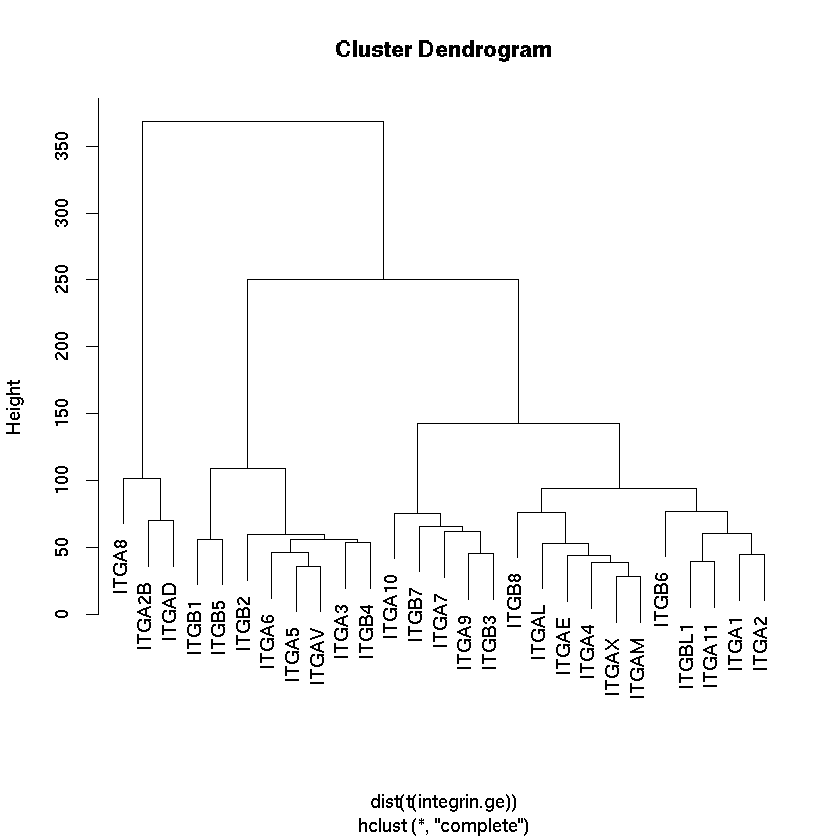

In [14]:
p1 <- plot(clusters)


In [15]:
covariates <- colnames(integrin[,2:28])

In [16]:
univ_formulas.DSS <- sapply(covariates,function(x) as.formula(paste('Surv(DSS.time,DSS)~', x)))

In [17]:
univ_models.DSS <- lapply(univ_formulas.DSS, function(x){coxph(x, data = integrin)})

In [18]:
univ_results.DSS <- lapply(univ_models.DSS, 
                       function(x){  
                          x <- summary(x) 
                          p.value<-signif(x$wald["pvalue"], digits=2) 
                          wald.test<-signif(x$wald["test"], digits=2) 
                          beta<-signif(x$coef[1], digits=2);#coeficient beta 
                          HR <-signif(x$coef[2], digits=2);#exp(beta) 
                          HR.confint.lower <- signif(x$conf.int[,"lower .95"], 2) 
                          HR.confint.upper <- signif(x$conf.int[,"upper .95"],2) 
                          HR <- paste0(HR, " (",  
                                       HR.confint.lower, "-", HR.confint.upper, ")") 
                          res<-c(beta, HR, wald.test, p.value) 
                          names(res)<-c("beta", "HR (95% CI for HR)", "wald.test",  
                                        "p.value") 
                          return(res) 
                          #return(exp(cbind(coef(x),confint(x)))) 
                         }) 
res.DSS <- t(as.data.frame(univ_results.DSS, check.names = FALSE)) 
as.data.frame(res.DSS)

,beta,HR (95% CI for HR),wald.test,p.value
,<fct>,<fct>,<fct>,<fct>
ITGA8,0.028,1 (0.91-1.2),0.2,0.66
ITGA9,-0.086,0.92 (0.79-1.1),1.3,0.26
ITGA1,0.21,1.2 (0.99-1.5),3.5,0.063
ITGA2,-0.11,0.9 (0.77-1),2,0.15
ITGA3,-0.18,0.84 (0.69-1),3,0.081
ITGA4,-0.031,0.97 (0.82-1.1),0.13,0.72
ITGA5,0.39,1.5 (1.1-2),7.6,0.0059
ITGA6,-0.034,0.97 (0.8-1.2),0.13,0.72
ITGA7,-0.041,0.96 (0.83-1.1),0.31,0.58


In [19]:
covariates <- colnames(integrin[,2:28]) 
 
 
univ_formulas.OS <- sapply(covariates, 
                        function(x) as.formula(paste('Surv(OS.time,OS)~', x))) 
                         
univ_models.OS <- lapply( univ_formulas.OS, function(x){coxph(x, data = integrin)})

In [20]:
univ_results.OS <- lapply(univ_models.OS, 
                       function(x){  
                          x <- summary(x) 
                          p.value<-signif(x$wald["pvalue"], digits=2) 
                          wald.test<-signif(x$wald["test"], digits=2) 
                          beta<-signif(x$coef[1], digits=2);#coeficient beta 
                          HR <-signif(x$coef[2], digits=2);#exp(beta) 
                          HR.confint.lower <- signif(x$conf.int[,"lower .95"], 2) 
                          HR.confint.upper <- signif(x$conf.int[,"upper .95"],2) 
                          HR <- paste0(HR, " (",  
                                       HR.confint.lower, "-", HR.confint.upper, ")") 
                          res<-c(beta, HR, wald.test, p.value) 
                          names(res)<-c("beta", "HR (95% CI for HR)", "wald.test",  
                                        "p.value") 
                          return(res) 
                          #return(exp(cbind(coef(x),confint(x)))) 
                         }) 
res.OS <- t(as.data.frame(univ_results.OS, check.names = FALSE)) 
as.data.frame(res.OS)

,beta,HR (95% CI for HR),wald.test,p.value
,<fct>,<fct>,<fct>,<fct>
ITGA8,0.039,1 (0.95-1.1),0.71,0.4
ITGA9,-0.036,0.97 (0.86-1.1),0.39,0.53
ITGA1,0.12,1.1 (0.96-1.3),2.1,0.15
ITGA2,-0.056,0.95 (0.84-1.1),0.9,0.34
ITGA3,-0.13,0.88 (0.76-1),3.1,0.08
ITGA4,-0.021,0.98 (0.86-1.1),0.11,0.74
ITGA5,0.12,1.1 (0.91-1.4),1.2,0.27
ITGA6,-0.063,0.94 (0.82-1.1),0.83,0.36
ITGA7,-0.033,0.97 (0.87-1.1),0.36,0.55


In [21]:
dat=cbind(integrin.ge,DSS.time=integrin$DSS.time,DSS=integrin$DSS)
dat = stats::na.omit(dat); 
fit.mic <- coxphMIC(formula = Surv(DSS.time, DSS)~., data=dat, CI.gamma = FALSE) 
print(fit.mic) 
 
fit0.mic <- coxphMIC(formula = Surv(DSS.time, DSS)~., data = dat, 
method = "BIC", scale.x = TRUE, method.beta0 = "zero") 
 c(fit.mic$min.Q, fit0.mic$min.Q)


Call:
coxphMIC(formula = Surv(DSS.time, DSS) ~ ., data = dat, CI.gamma = FALSE)

Table of Estimated Coefficients via MIC:

         beta0   gamma se.gamma  z.stat p.value beta.MIC se.beta.MIC
ITGA8  -0.0450  0.0000   0.1823 -0.0002  0.9999   0.0000          NA
ITGA9  -0.3074 -0.3333   0.1659 -2.0093  0.0445  -0.3333      0.1227
ITGA1   0.0779  0.0000   0.2227  0.0000  1.0000   0.0000          NA
ITGA2  -0.2419 -0.2623   0.1515 -1.7310  0.0834  -0.2623      0.1293
ITGA3  -0.3080 -0.3071   0.1357 -2.2635  0.0236  -0.3071      0.1194
ITGA4   0.0273  0.0000   0.1914 -0.0001  0.9999   0.0000          NA
ITGA5   0.2805  0.4322   0.1734  2.4925  0.0127   0.4322      0.1335
ITGA6  -0.1656  0.0000   0.1422 -0.0001  1.0000   0.0000          NA
ITGA7   0.0238  0.0000   0.1406 -0.0001  0.9999   0.0000          NA
ITGAX  -0.5086 -0.5756   0.2284 -2.5201  0.0117  -0.5756      0.2012
ITGAV   0.1262  0.0000   0.2117  0.0000  1.0000   0.0000          NA
ITGAL  -0.2093 -0.2196   0.1678 -1.3088  0.1906 

[1] 989.7918 990.0921

In [22]:
dat.OS=cbind(integrin.ge,OS.time=integrin$OS.time,OS=integrin$OS) 
 dat.OS <- stats::na.omit(dat.OS); 
fit.mic.OS <- coxphMIC(formula = Surv(OS.time, OS)~., data=dat.OS, CI.gamma = FALSE) 
print(fit.mic.OS)


Call:
coxphMIC(formula = Surv(OS.time, OS) ~ ., data = dat.OS, CI.gamma = FALSE)

Table of Estimated Coefficients via MIC:

         beta0   gamma se.gamma  z.stat p.value beta.MIC se.beta.MIC
ITGA8  -0.0113  0.0000   0.1377  0.0000  1.0000   0.0000          NA
ITGA9  -0.1026  0.0000   0.1133  0.0000  1.0000   0.0000          NA
ITGA1  -0.0484  0.0000   0.1748  0.0000  1.0000   0.0000          NA
ITGA2  -0.1566  0.0000   0.1095  0.0000  1.0000   0.0000          NA
ITGA3  -0.2356 -0.1924   0.1012 -1.9002  0.0574  -0.1924      0.0830
ITGA4  -0.0411  0.0000   0.1488  0.0000  1.0000   0.0000          NA
ITGA5   0.0556  0.0000   0.1397  0.0000  1.0000   0.0000          NA
ITGA6  -0.1379  0.0000   0.1071  0.0000  1.0000   0.0000          NA
ITGA7   0.0835  0.0000   0.1074  0.0000  1.0000   0.0000          NA
ITGAX  -0.3025 -0.2055   0.1691 -1.2152  0.2243  -0.2055      0.0756
ITGAV   0.1361  0.0000   0.1479  0.0001  0.9999   0.0000          NA
ITGAL  -0.0482  0.0000   0.1280 -0.0001  0.9999

In [23]:
dat=cbind(integrin.ge,DSS.time=integrin$DSS.time,DSS=integrin$DSS) 
dat.OS=cbind(integrin.ge,OS.time=integrin$OS.time,OS=integrin$OS) 
 
pbc_rf <- rfsrc( Surv(DSS.time, DSS) ~ ., data = dat, nsplit = 10, na.action = "na.impute",importance=TRUE) 
pbc_rf_IMP=vimp(pbc_rf)$importance
pbc_rf_OS <- rfsrc( Surv(OS.time, OS) ~ ., data = dat.OS, nsplit = 10, na.action = "na.impute",importance=TRUE) 
pbc_rf_IMP_OS=vimp(pbc_rf_OS)$importance 
 
IMP=cbind(pbc_rf_IMP,pbc_rf_IMP_OS)

K-means clustering with 2 clusters of sizes 673, 431

Cluster means:
     ITGB1    ITGA5    ITGAL
1 13.50558 11.12001 9.588094
2 13.49532 10.87510 7.464662

Clustering vector:
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   1    2    1    1    1    1    1    2    1    1    1    2    2    1    1    1 
  17   18   20   21   22   23   24   25   26   27   28   29   30   31   32   33 
   1    2    2    2    1    1    1    1    2    1    1    2    1    1    1    1 
  34   35   36   37   38   41   43   44   45   46   47   48   49   50   51   52 
   2    2    1    2    1    1    1    1    2    1    1    1    1    1    1    2 
  53   54   55   56   57   59   63   64   65   66   68   69   70   73   74   75 
   1    1    2    1    2    2    1    1    1    2    2    2    2    1    1    2 
  76   77   79   80   81   82   83   84   85   86   87   88   89   90   91   92 
   2    2    1    1    1    1    1    1    2    2    1    1    2    1    1    2 
  94   95   96

K-means clustering with 3 clusters of sizes 444, 223, 437

Cluster means:
     ITGB1    ITGA5    ITGAL
1 13.80611 11.48890 8.501688
2 13.27009 10.39958 6.968302
3 13.31029 10.87130 9.934497

Clustering vector:
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   1    1    1    3    1    1    1    1    3    1    3    2    1    3    3    3 
  17   18   20   21   22   23   24   25   26   27   28   29   30   31   32   33 
   1    1    2    1    1    3    1    3    2    3    1    2    1    3    3    3 
  34   35   36   37   38   41   43   44   45   46   47   48   49   50   51   52 
   2    1    3    1    3    1    1    1    2    3    3    3    1    1    1    1 
  53   54   55   56   57   59   63   64   65   66   68   69   70   73   74   75 
   3    3    1    1    1    1    3    1    3    1    2    2    2    3    1    2 
  76   77   79   80   81   82   83   84   85   86   87   88   89   90   91   92 
   2    2    3    3    1    3    3    1    2    2    3    3  

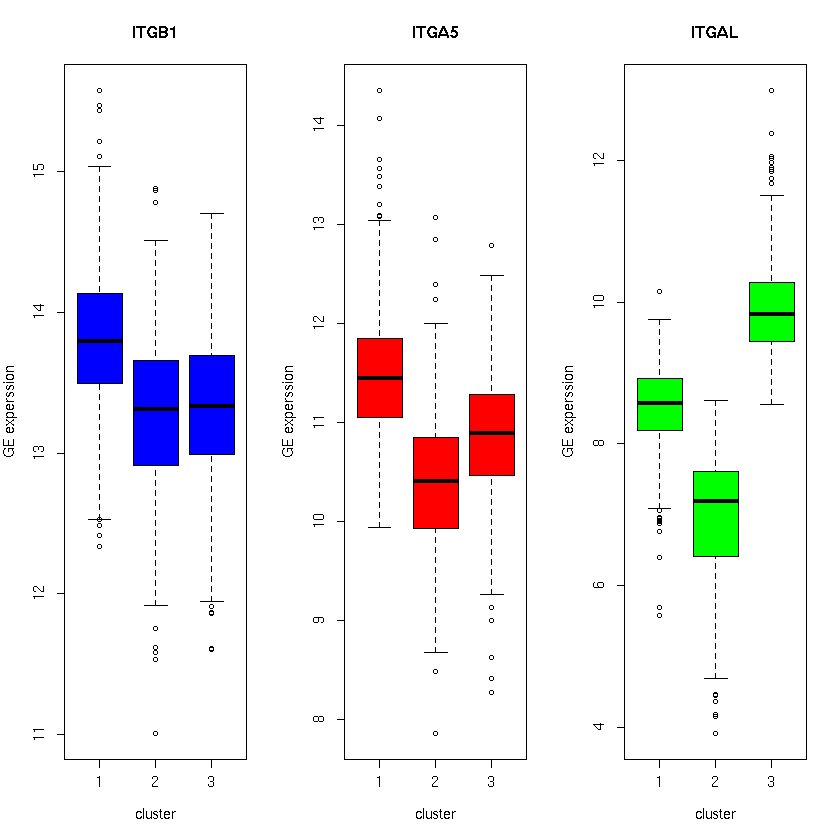

In [24]:
integrin.select=integrin[,c("ITGB1", "ITGA5", "ITGAL")] 
 
set.seed(300) # Setting seed 
kmeans.re2 <- kmeans(integrin.select, centers = 2, nstart = 20) 
kmeans.re2 # 38.1% 
set.seed(300) 
kmeans.re3 <- kmeans(integrin.select, centers = 3, nstart = 20) 
kmeans.re3 # 51.4% 
GEdata=cbind(integrin.select,cluster=kmeans.re3$cluster) 
par(mfrow=c(1,3)) 
boxplot(GEdata$ITGB1 ~ GEdata$cluster, 
         col='blue', 
         xlab='cluster', 
         ylab='GE experssion', 
         main='ITGB1')  
 
boxplot(GEdata$ITGA5 ~ GEdata$cluster,
        col='red', 
        xlab='cluster', 
        ylab='GE experssion', 
        main='ITGA5')  
 
boxplot(GEdata$ITGAL ~ GEdata$cluster, 
         col='green', 
         xlab='cluster', 
         ylab='GE experssion', 
         main='ITGAL')

In [25]:
require(MASS)
GEdata=cbind(integrin.select,cluster=kmeans.re3$cluster) 
require(rgl) 
options(jupyter.plot_mimetypes = 'image/png')
#plot3d(df$X1, df$X2, df$X3, col=as.numeric(df$fac)) 
plot3d(GEdata$ITGB1,GEdata$ITGA5,GEdata$ITGAL,col=as.numeric(GEdata$cluster), col.axis = "blue",col.grid = "lightblue", main = "", pch = 20)
set.seed(240)   
kmeans.re4 <- kmeans(integrin.select, centers = 4, nstart = 20) 
kmeans.re4 # 60.7%

Loading required package: MASS

Loading required package: rgl



K-means clustering with 4 clusters of sizes 319, 169, 320, 296

Cluster means:
     ITGB1    ITGA5     ITGAL
1 13.95705 11.73070  8.544066
2 13.42522 10.63998  6.577827
3 13.43589 11.07824 10.209394
4 13.12531 10.42449  8.668380

Clustering vector:
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   1    1    1    3    4    1    1    1    3    1    4    2    1    3    3    3 
  17   18   20   21   22   23   24   25   26   27   28   29   30   31   32   33 
   1    1    2    4    1    3    1    3    2    3    4    2    1    4    4    4 
  34   35   36   37   38   41   43   44   45   46   47   48   49   50   51   52 
   2    1    4    1    3    1    1    4    4    3    3    3    1    4    1    1 
  53   54   55   56   57   59   63   64   65   66   68   69   70   73   74   75 
   3    3    4    1    1    1    3    1    3    4    2    2    2    3    1    2 
  76   77   79   80   81   82   83   84   85   86   87   88   89   90   91   92 
   2    2    3    4   

In [28]:
png("not_normal_data_ggsurvplot_clusters.png", units="in", width=4.5,height=4, res=400,type='cairo')


survdata=cbind(dat,cluster=kmeans.re3$cluster) #First setup survival object
km <- Surv(time = survdata[,"DSS.time"], event = survdata[,"DSS"]) 
km_treatment<-survfit(km~cluster,data=survdata,type='kaplan-meier',conf.type='log')
survdiff(km ~ cluster,data=survdata)
p <- ggsurvplot(km_treatment,conf.int = 'FALSE', censor.size=4,size = 1,ylim=c(0.4,1))#+guides(colour = guide_legend(nrow = 2))

ggpar(p,
      font.x = c(22),
      font.y = c(22), 
      legend=c(0.26,0.2),
      font.legend = c(17), 
      font.tickslab = c(17))
dev.off()

Call:
survdiff(formula = km ~ cluster, data = survdata)

n=1081, 23 observations deleted due to missingness.

            N Observed Expected (O-E)^2/E (O-E)^2/V
cluster=1 438       45     32.5     4.830     7.849
cluster=2 219       21     17.5     0.694     0.881
cluster=3 424       19     35.0     7.322    12.501

 Chisq= 12.9  on 2 degrees of freedom, p= 0.002 

PNG 
  2